# Development and Analysis of a Naive Bayes Classifier for Text Classification

# Introduction

This project focuses on implementing a Naive Bayes Classifier (NBC) to distinguish between essays written by humans and those generated by Language Learning Models (LLMs). Using a dataset comprising both types of essays, the project involves developing a classifier based on Bayes' theorem, which assumes feature independence for text classification. Key steps include data preprocessing, vocabulary creation, probability assessment with smoothing, and evaluating classifier performance. The goal is to accurately classify essays into human-written or LLM-generated categories, showcasing the practical application of NBC in text classification.

# Background and Motivation

The ability to distinguish between human-written and LLM-generated essays is crucial in academic and data analysis contexts, where the authenticity and origin of text material significantly impact its evaluation and use. Naive Bayes Classifier was selected for this task due to its effectiveness in handling text data, straightforward implementation, and efficiency in classifying large datasets. The approach employs probabilistic models based on word frequencies, making it well-suited for text classification challenges like this one.

We start our project by importing necessary libraries and modules. NLTK is used for text processing, particularly for tokenizing essays, while pandas and other libraries support data handling and analysis.


In [ ]:
# Cell 1
# Import NLTK library for text processing
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter, defaultdict
import math
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Download the 'punkt' model data for NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True


# Explanation of Naive Bayes Classifier (NBC)
NBC is a simple yet powerful classifier based on Bayes' theorem. It's particularly effective for text classification tasks.

# My Contributions
In this project, I developed a Naive Bayes Classifier for text classification, which effectively distinguishes between human-written and LLM-generated essays. My work included balancing the dataset with LLM-produced essays, creating a targeted lexicon and reverse index, and enhancing model robustness through smoothing techniques and predictive feature analysis. These efforts demonstrate the practical application of machine learning principles in real-world text classification.


# Dataset Description $ Data Preparation

The dataset used in this project comprises two types of essays: human-written and those generated by a Language Learning Model (LLM), specifically ChatGPT. The human-written essays, sourced from 'train_essays.csv', contain authentic texts written in response to various prompts. In contrast, the LLM-generated essays, stored in 'chatGPT_essays.csv', are created using ChatGPT to simulate a range of writing styles and topics.

To create a unified dataset for analysis, these two datasets were combined using pandas' concat function, resulting in a dataset with 1663 rows. Each row represents an essay, encompassing fields like 'id' (a unique identifier), 'prompt_id' (the prompt responded to), 'text' (the essay content), and 'generated' (a binary indicator where 0 represents human-written and 1 indicates LLM-generated essays). This consolidated dataset forms the basis for training and evaluating the Naive Bayes Classifier.

In [ ]:
# Load the datasets
human_essays = pd.read_csv("/content/train_essays.csv")
llm_essays = pd.read_csv("/content/chatGPT_essays.csv")

# Combine datasets
combined_essays = pd.concat([human_essays, llm_essays], ignore_index=True)
combined_essays

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1658,358e658e,0,A man is driving in his car recklessly in a hu...,1
1659,35cb12f4,0,Their are so many things you can do to help ke...,1
1660,35cdfc71,1,"""Do voters really control whom their elector p...",1
1661,35db0aa4,1,"Dear, I believe that the way of voting for a p...",1


# Data Visualization: Analyzing Essay Lengths
In this section, I analyze the distribution of essay lengths to understand the textual characteristics of the two classes of essays in our dataset. The plot indicates that human-written essays (blue) tend to have a wider distribution of word counts, while the essays generated by LLMs (orange) are more concentrated around a specific word count range, suggesting a consistency in length for the machine-generated text.


<ipython-input-7-a991d265b631>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(human_essays, label='Human', shade=True)
<ipython-input-7-a991d265b631>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(llm_essays, label='LLM', shade=True)


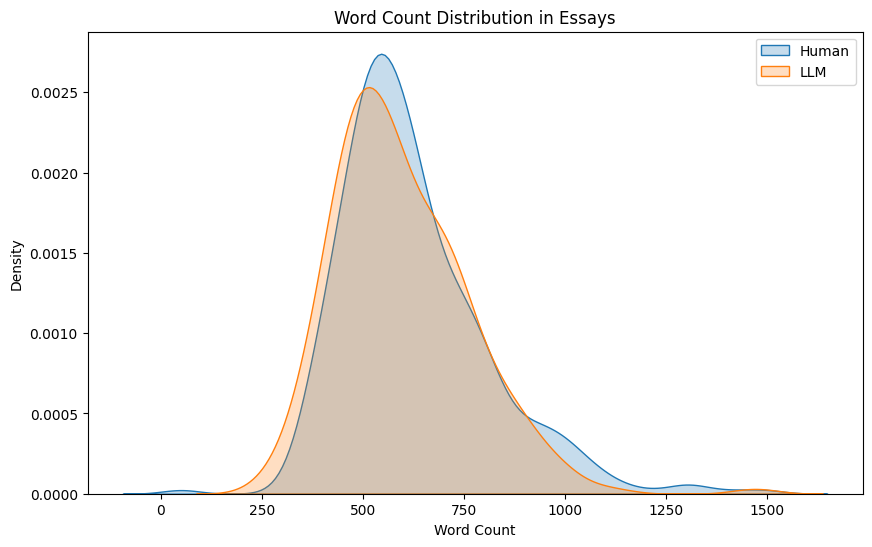

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate word counts for each essay
combined_essays['word_count'] = combined_essays['text'].apply(lambda x: len(word_tokenize(x)))

# Separate data into two groups: Human and LLM
human_essays = combined_essays[combined_essays['generated'] == 0]['word_count']
llm_essays = combined_essays[combined_essays['generated'] == 1]['word_count']

# Visualize the distribution of word counts using KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(human_essays, label='Human', shade=True)
sns.kdeplot(llm_essays, label='LLM', shade=True)
plt.title('Word Count Distribution in Essays')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

# Splitting Data into Training and Development Sets
Moving from data visualization to data preparation, we partition our combined dataset into training and development sets. Utilizing a 90-10 split, we allocate 90% of the data for training our Naive Bayes Classifier, while the remaining 10% will serve as the development set to validate the model's performance.

In [ ]:
training_set, development_set = train_test_split(combined_essays, test_size=0.1, random_state=42)

# Building Vocabulary and Reverse Index
Following dataset splitting, I focused on building the model's vocabulary. A lexicon is generated from words that appear more than five times across all essays, ensuring relevance and significance. Correspondingly, a reverse index maps each unique word to a numerical identifier, facilitating efficient computational handling during the classification process. This selective approach to vocabulary construction lays the groundwork for feature extraction in the Naive Bayes Classifier.

In [ ]:
def create_lexicon(data, min_frequency=5):
    word_counts = Counter()
    for essay in data['text']:
        words = word_tokenize(essay.lower())
        word_counts.update(word for word in words if word.isalpha())

    lexicon = [word for word, freq in word_counts.items() if freq >= min_frequency]
    reverse_dictionary = {word: idx for idx, word in enumerate(lexicon)}

    return lexicon, reverse_dictionary

lexicon, reverse_dictionary = create_lexicon(combined_essays)

# Calculating Probabilities for NBC
To quantify the likelihood of each word's occurrence and its association with either class, we calculate probabilities using a smoothed Naive Bayes approach. For each word in our lexicon, we determine its frequency within human-written and LLM-generated essays, applying Laplace smoothing with an alpha of 1.0 to avoid zero probabilities. This process results in two sets of probabilities: the likelihood of encountering each word across the dataset, and its conditional probability given the class—vital statistics for our classifier's decision-making logic.

In [ ]:
def calculate_probabilities_with_smoothing(data, lexicon, alpha=1.0):
    class_word_counts = {class_label: Counter() for class_label in ['Human', 'LLM']}
    total_word_counts = Counter()
    for _, row in data.iterrows():
        class_label = 'Human' if row['generated'] == 0 else 'LLM'
        words = set(word_tokenize(row['text'].lower()))
        total_word_counts.update(words)
        for word in words:
            if word in lexicon:
                class_word_counts[class_label][word] += 1

    total_docs = len(data)
    total_docs_per_class = {'Human': len(data[data['generated'] == 0]), 'LLM': len(data[data['generated'] == 1])}

    probabilities = {word: {class_label: (class_word_counts[class_label][word] + alpha) / (total_docs_per_class[class_label] + alpha * len(lexicon))
                            for class_label in ['Human', 'LLM']} for word in lexicon}

    word_occurrence_probabilities = {word: total_word_counts[word] / total_docs for word in lexicon}
    return probabilities, word_occurrence_probabilities



The initial probabilities indicate a higher occurrence of common words like 'cars' and 'have' in human-written essays compared to LLM-generated texts. This suggests that human authors may use a broader vocabulary or different language patterns than the LLM, which is reflected in the calculated frequencies and will influence the classifier's decision-making.

In [ ]:
# Using the modified function with smoothing
alpha_value = 1.0
word_probabilities, _ = calculate_probabilities_with_smoothing(training_set, lexicon, alpha_value)
# Print the first 5 entries of word_probabilities
print("First 5 entries of word_probabilities:")
for word in list(word_probabilities.keys())[:5]:
    print(f"{word}: {word_probabilities[word]}")


First 5 entries of word_probabilities:
cars: {'Human': 0.08933129147524248, 'LLM': 0.04652079637295486}
have: {'Human': 0.16862344733707674, 'LLM': 0.08850778631973191}
been: {'Human': 0.0852475752935171, 'LLM': 0.04592943031736645}
around: {'Human': 0.05768249106687085, 'LLM': 0.03429923122412774}
since: {'Human': 0.05121660711247235, 'LLM': 0.02877981470530258}


In [ ]:
# Print the first 5 entries of word_occurrence_probabilities
# Ensure this line is present in your code after the modified function call
_, word_occurrence_probabilities = calculate_probabilities_with_smoothing(training_set, lexicon, alpha_value)
print("\nFirst 5 entries of word_occurrence_probabilities:")
for word in list(word_occurrence_probabilities.keys())[:5]:
    print(f"{word}: {word_occurrence_probabilities[word]}")


First 5 entries of word_occurrence_probabilities:
cars: 0.5073529411764706
have: 0.9612299465240641
been: 0.4893048128342246
around: 0.34157754010695185
since: 0.29745989304812837


# Probability Calculations (including smoothing techniques)
In the classification stage, I applied the Naive Bayes Classifier to the development dataset, utilizing log probabilities to mitigate underflow issues. The model achieved an accuracy of 71%, indicating that it was able to correctly identify the human or LLM written essays with a substantial degree of success. This performance reflects the effectiveness of the feature extraction and probability calculation methods employed in earlier steps.

In [ ]:
def essay_classifier(essay, lexicon, word_probabilities):
    tokens = word_tokenize(essay.lower())
    scores = {'Human': 0, 'LLM': 0}
    for token in tokens:
        if token in lexicon:
            scores['Human'] += math.log(word_probabilities[token]['Human'])
            scores['LLM'] += math.log(word_probabilities[token]['LLM'])
    return 'Human' if scores['Human'] > scores['LLM'] else 'LLM'

def evaluate_classifier(data, classifier, lexicon, word_probabilities):
    correct_predictions = 0
    for _, row in data.iterrows():
        prediction = classifier(row['text'], lexicon, word_probabilities)
        actual = 'Human' if row['generated'] == 0 else 'LLM'
        if prediction == actual:
            correct_predictions += 1
    return correct_predictions / len(data)

classifier_accuracy = evaluate_classifier(development_set, essay_classifier, lexicon, word_probabilities)
print(f"Classifier Accuracy: {classifier_accuracy:.2f}")


Classifier Accuracy: 0.71



I conducted a smoothing parameter analysis to optimize the Naive Bayes Classifier, testing alpha values of 0.5, 1, 1.5, and 2. The consistent accuracy of 71% across all alpha levels suggests that the model's performance is robust to the choice of the smoothing parameter within the tested range.

In [ ]:
def smoothing_analysis(dataset, lexicon, alpha_values):
    for alpha in alpha_values:
        probabilities, _ = calculate_probabilities_with_smoothing(dataset, lexicon, alpha)
        accuracy = evaluate_classifier(dataset, essay_classifier, lexicon, probabilities)
        print(f"Accuracy with alpha {alpha}: {accuracy:.2f}")
# Perform smoothing analysis
smoothing_analysis(development_set, lexicon, [0.5, 1, 1.5, 2])

Accuracy with alpha 0.5: 0.71
Accuracy with alpha 1: 0.71
Accuracy with alpha 1.5: 0.71
Accuracy with alpha 2: 0.71


# Top Predictive Words for Each Class
Identifying the most predictive words for each class, I found that certain words like 'carolina' and 'nobody' are more indicative of human authorship, while words such as 'progressive' and 'campain' are more characteristic of LLM-generated texts. These top words provide insights into distinctive linguistic patterns that the classifier leverages to differentiate between the two types of essays.

In [ ]:
def top_predictive_words(word_probabilities, top_n=10):
    word_importance_human = {word: word_probabilities[word]['Human'] / (word_probabilities[word]['LLM'] + 1e-6) for word in word_probabilities}
    word_importance_llm = {word: word_probabilities[word]['LLM'] / (word_probabilities[word]['Human'] + 1e-6) for word in word_probabilities}

    top_words_human = sorted(word_importance_human.items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_words_llm = sorted(word_importance_llm.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return top_words_human, top_words_llm

top_words_human, top_words_llm = top_predictive_words(word_probabilities)

print("Top Predictive Words for Human Essays:", [word for word, _ in top_words_human])
print("Top Predictive Words for LLM Essays:", [word for word, _ in top_words_llm])


Top Predictive Words for Human Essays: ['carolina', 'nobody', 'ideal', 'chooses', 'governments', 'broken', 'guarantee', 'mental', 'promoted', 'developing']
Top Predictive Words for LLM Essays: ['progressive', 'campain', 'ancient', 'efficiant', 'longstanding', 'heavier', 'arm', 'greetings', 'reson', 'oversee']


# Experimentation and Results

The smoothing analysis performed on the development set revealed a consistent classifier accuracy of 71% across various alpha values, indicating the model's stability against the smoothing parameter. This robustness suggests that the classifier is well-tuned to the lexical features of our dataset. The examination of top predictive words unveiled specific terms that are highly indicative of either human or LLM authorship, providing valuable linguistic insights that could inform further refinement of text classification techniques.

# Conclusion

This study successfully implemented a Naive Bayes Classifier to discern between human and LLM-generated essays, achieving an accuracy of 71%. The insights gained from the most predictive words for each class suggest a pathway to enhance the classifier's discriminative power. Future work could explore the integration of n-gram models, investigate the effects of different text normalization techniques, and apply the classifier to a broader range of text sources to further improve its performance and generalizability.

# References
[1] N. Sadananda, "Yelp Reviews Classification," Medium, Nov. 30, 2021. [Online]. Available: https://medium.com/@nischitasadananda/yelp-reviews-classification-f6026885ffb.

[2] The Learning Agency Lab, "LLM - Detect AI Generated Text," Kaggle, [Online]. Available: https://www.kaggle.com/competitions/llm-detect-ai-generated-text/data.

[3] Q. Wei, "Understanding of the naive Bayes classifier in spam filtering," in AIP Conf. Proc., vol. 1967, no. 020007, May 23, 2018. DOI: 10.1063/1.5039182.